# **Predicting Hospital Readmission for Diabetes Patients**

## INFO 1998 Spring '23 Final Project

### Minhaj Fahad, Habiba Khan

Hospital readmission has several implications, including being a significant contributor to hospital patient services spending for both the hospital and the patient. It is also associated with poor quality of care, increased risks of complications and mortality, and it being necessary to know how to allocate the necessary resources to high-risk patients. 

Diabetes is a significant health condition globally, with an estimated 37.3 million Americans living with diabetes approximately 1 in 10 people, according to the Center for Disease Control and Prevention. In the United States, diabetes is the one of the most expensive chronic diseases, with an estimated cost of $327 billion in 2017, according to the American Diabetes Association. Diabetes is also one of the top ten leading causes of death in the united states, as well as a leading cause of kidney failure, lower limb amputaions, and adult blindness (CDC). 

Hospitalized patients with diabetes are at a higher risk of readmission than those without diabetes, which can lead to increased healthcare costs and negatively impact patient outcomes. This project focuses on analyzing the correlation betwen the various features and hospital readmissions as a means of reducing hospital readmission. In this project, we will be testing a machine learning models that can predict a patient's readmission into a hospital based on a considerable amount of categories, and access the categories that will provide the most risk for readmission.

We obtain our data from **Diabetes 130-US hospitals for years 1999-2008** https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008 and https://www.hindawi.com/journals/bmri/2014/781670/ which contains information on individuals with diabetes and their hospitalization and readmission records


In [ ]:
#from google.colab import files
#uploaded = files.upload()
#Import any necessary packages
import pandas as pd
import seaborn as sns
import numpy as np
import random
import matplotlib.pyplot as plt
from numpy.random.mtrand import rand
from matplotlib.patches import Ellipse
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from scipy.spatial.distance import cdist
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_blobs
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import cluster
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from contextlib import suppress

Saving diabetic_data.csv to diabetic_data (3).csv


The dataset used in this study consisted of 101,766 instances with 50 features. Among the features, some important ones included the length of hospital stay in days, medication information, a patient's race, and the number of lab tests performed. The specific description of each value within the dataset is available on a research article in the BioMed Research International journal: https://www.hindawi.com/journals/bmri/2014/781670/tab1/ 


In [ ]:
#Create dataframe from dataset
df = pd.read_csv("diabetic_data.csv")
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [ ]:
df.drop_duplicates()
df.shape

(101766, 50)

In [ ]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


##Preprocessing and Manipulation



To clean the dataset and remove irrelevant information for this project, we eliminated columns such as diag_1, diag_2, diag_3, payer_code, and medical specialty, among others. These columns contained either unnecessary or unknown information, such as "Null", "Not Available", or "N/A".

In [ ]:
#Drop unneccessary columns
df = df.drop(["weight", "payer_code", "medical_specialty", "A1Cresult", 'max_glu_serum','diag_1',
              'diag_2', 'diag_3', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
              'examide', 'citoglipton','metformin-rosiglitazone'], axis=1)
# "weight", "payer_code", "medical_specialty", "A1Cresult", 'max_glu_serum' are mainly empty
# diag_1', 'diag_2', 'diag_3', 'admission_type_id', 'discharge_disposition_id'
# 'examide', 'citoglipton','metformin-rosiglitazone' have the same row values, so not useful for prediction

Based on previous research that explored the relationship between a patient's race and sex and their medical treatment, we sought to investigate how these two features impact the readmission status of patients in our dataset. To ensure that we had reliable and accurate data to work with, we chose to drop any row where the input for race was "?" or the input for gender was unknown. This helped us to eliminate any noise or inconsistencies that could have affected the accuracy of our analysis. 

In [ ]:
#Set age to upper limit instead of str & remove rows w/o race or gender
for i in range(len(df['age'])):
  if df['race'][i]=="?" or df['gender'][i]=="Unknown/Invalid":
    df = df.drop(i)
    i -=1
    continue
  df['age'][i] = (int(df['age'][i][1])+1)*10

Binary values were used to count the total number of medications taken by each patient in order to examine its relationship with readmission status. The medication columns were converted into binary values, where 0 represented "no medication use" and 1 represented "medication use". These values were summed up to create a new column called "numMed", indicating the total number of medications a patient was taking. We also used binary to convert readmission status to 0 if the patient was not readmitteed or were not readmitted within a month and 1 to represent patients that were readmitted within a month. This simplifies and standardizes the measurement of medication use across different patients and medications, allowing for easy comparison and reduced feature count for efficient analysis later on.

In [ ]:
#Make binary values for columns and find # of medications per patient
medication = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-pioglitazone']
df["numMed"] = 0
for i in medication:
  df[i] = df[i].replace("No", 0)
  df[i] = df[i].replace(["Up", "Down", "Steady"], 1)
  df['numMed'] = df["numMed"]+df[i]

df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)
df['change'] = df['change'].replace('Ch', 1)
df['change'] = df['change'].replace('No', 0)

In [ ]:
#Change readmission into binary values, readmission within 30 days
df['readmitted'] = df['readmitted'].replace('NO', 0)
df['readmitted'] = df['readmitted'].replace('>30', 0)
df['readmitted'] = df['readmitted'].replace('<30', 1)

In [ ]:
df.head()

,encounter_id,patient_nbr,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,numMed
0,2278392,8222157,Caucasian,Female,10,1,41,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,149190,55629189,Caucasian,Female,20,3,59,0,18,0,...,0,1,0,0,0,0,1,1,0,1
2,64410,86047875,AfricanAmerican,Female,30,2,11,5,13,2,...,0,0,0,0,0,0,0,1,0,1
3,500364,82442376,Caucasian,Male,40,2,44,1,16,0,...,0,1,0,0,0,0,1,1,0,1
4,16680,42519267,Caucasian,Male,50,1,51,0,8,0,...,0,1,0,0,0,0,1,1,0,2


##Visualization

We hypotheszide that the number of lab tests performed on a diabetic patient could be an important factor in predicting their risk of readmission. This is because we assumed lab tests were relevant when attempting to deduce the health of the patient. Lab tests can provide essential information about a patient's health status, such as their blood sugar levels, kidney function, or cholesterol levels. An abnormality on these tests could indicate that a patient's diabetes is not well-controlled, which could increase their risk of readmission. Additionally, frequent lab testing may be a sign that a patient's diabetes is more complex or severe, which could also increase their risk of readmission. Finally, if a patient has been readmitted for diabetes-related complications, they may require more frequent lab testing to monitor their condition and ensure that they are responding to treatment. Therefore, we assumed there would be a correlation between the number of lab tests performed and the readmission rate of diabetic patients and it would be an essential area of exploration in our analysis. However, as seen below, there does not seem to be a correlation. 


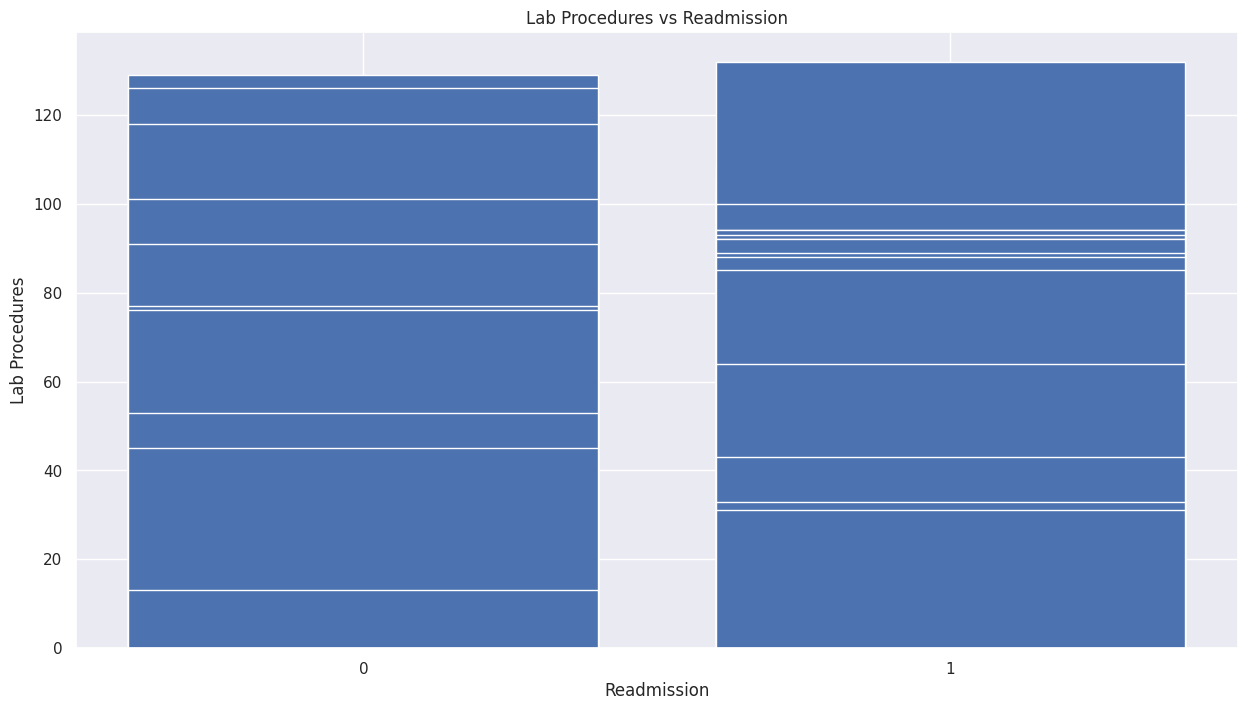

In [ ]:
plt.bar(df["readmitted"],df['num_lab_procedures'])
plt.title('Lab Procedures vs Readmission')
plt.xlabel('Readmission')
plt.xticks([0,1])
plt.ylabel('Lab Procedures')

plt.show()

<ipython-input-151-d3cbff87c639>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


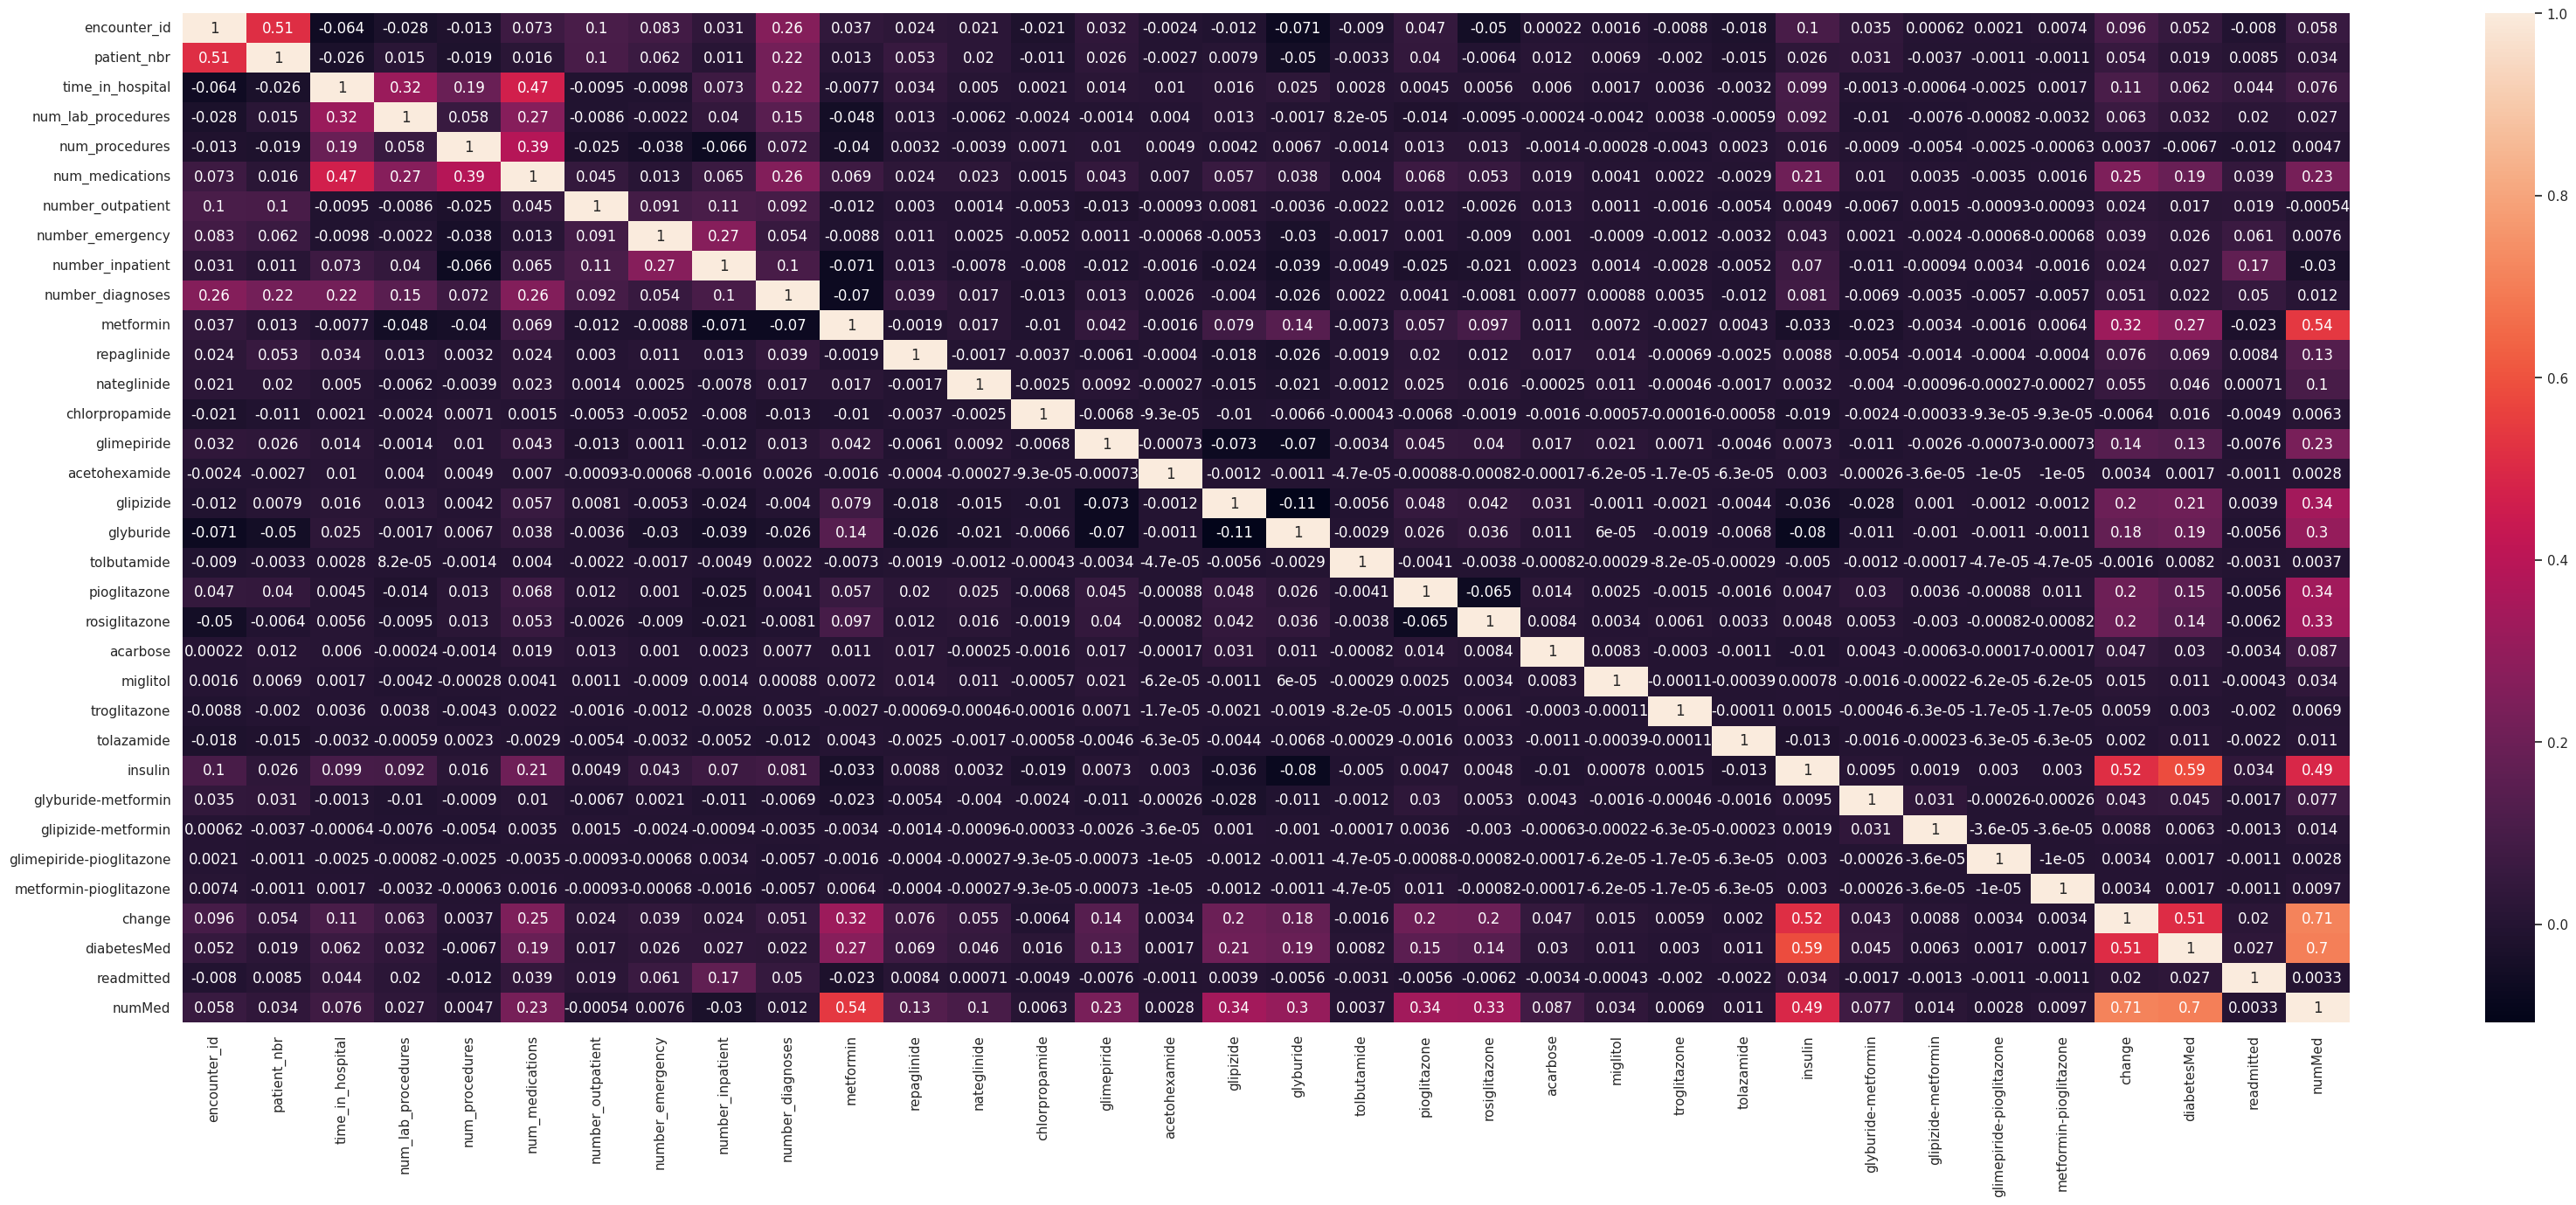

In [ ]:
#Create a correlation heatmap
corr = df.corr()
plt.figure(figsize = (40,15))
sns.heatmap(corr, annot=True)
plt.show()

Current order of correlation >.3%: number_inpatient>number_emergency > number_dianoses > time_in_hospital > num_medications > insulin

This will be used as our predictive categories for the models. 

##Machine Learning Models

###Linear Regression Model

Let's first try a linear model with the most correlated value for readmittance, namely number_inpatient. It seems unlikely this model would accurately predict readmission, however we can use this information to see where the error falls and what other models we coud try out.

In [ ]:
#Dictionary for all model accuracies
accuracies = {}
# Train a linear regression model on our data 
X = df[["number_inpatient"]]
Y = df['readmitted']
# Split the data into a training set and test set using train_test_split
train_x, test_x, train_y, test_y = train_test_split(X,Y, test_size= .2, random_state=42)

# Instantiate linear regression model
model = LinearRegression()
model.fit(train_x, train_y)

#Predict model
predictions = model.predict(test_x)

print("Score:", model.score(test_x, test_y))
accuracies["Linear"]=model.score(test_x, test_y)

Score: 0.02367313216662592


As expected, the score is significally small. Let's try graphing to see what was wrong. 

Below we can see that the readmissions switches between 1 and 0 because we categorized for it to be binary values, and so our model cannot be linear and requires more assistance to accurately predict readmissions.

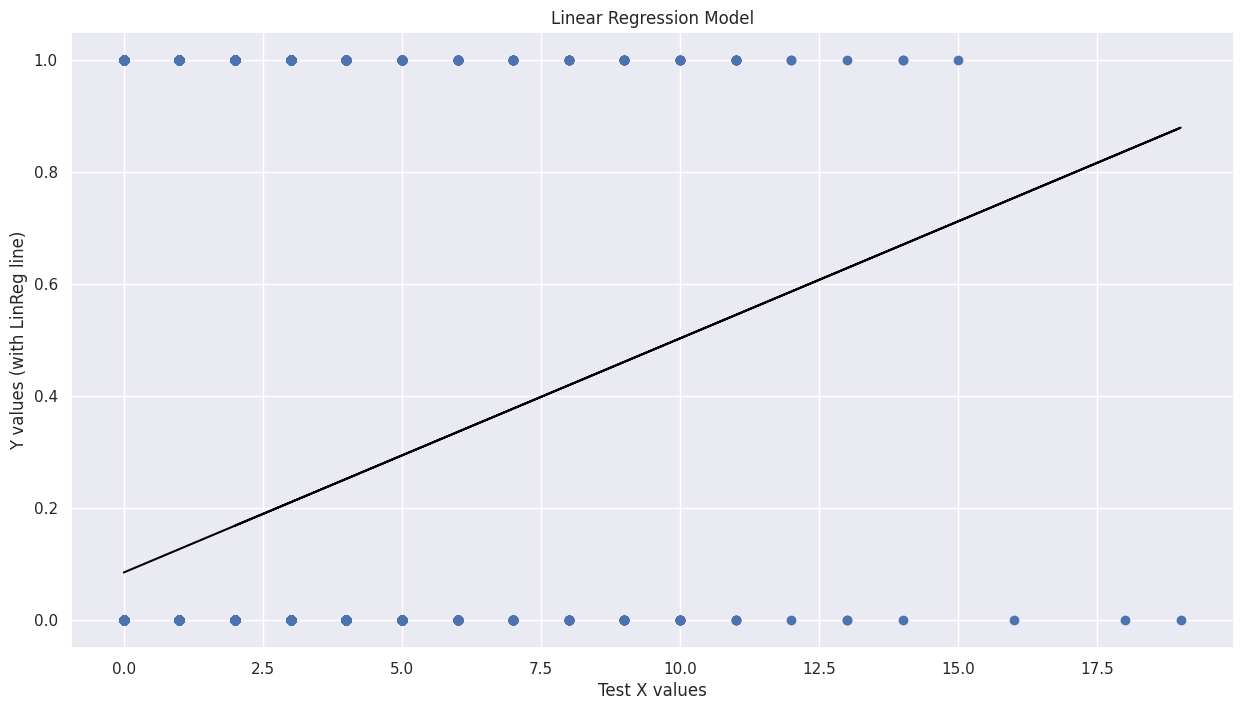

In [ ]:
# Look at the output of our linear regression model vs the actual data (test set)
# Plot Predictions
plt.plot(test_x, predictions, c = 'black')
# Plot Actual Data
plt.scatter(test_x, test_y)

plt.title('Linear Regression Model')
plt.xlabel('Test X values')
plt.ylabel('Y values (with LinReg line)')

plt.show()

###Logistical Regression Model

In [ ]:
#Try a logistical model with the 6 most correlated categories to 
X = df[["number_inpatient", 'number_emergency', 'number_diagnoses', 'time_in_hospital', 'num_medications', 'insulin']]
Y = df['readmitted']

train_x, test_x, train_y, test_y = train_test_split(X,Y, test_size= .2, random_state=42)

model = LogisticRegression()
model.fit(train_x, train_y)

pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

print("Test Accuracy: ", accuracy_score(train_y, pred_train))
print("Training Accuracy: ", accuracy_score(test_y, pred_test))

accuracies["Logistical"]=accuracy_score(test_y, pred_test)
#confusion_matrix(model, test_x, test_y)

Test Accuracy:  0.8876911286168382
Training Accuracy:  0.8873812754409769


The logistical model is very accuracte when it comes to testing the readmission of diabetes patients! Below is a plot of how it works. 

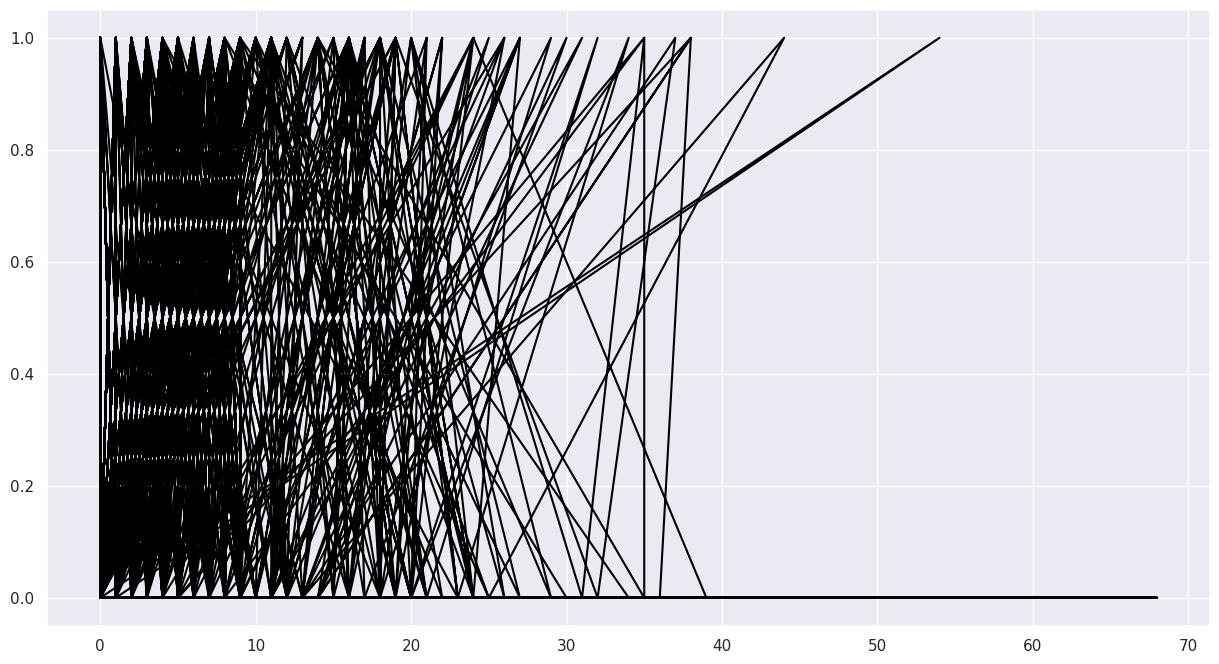

Lets try testing some other models to see if it matches the binary values of readmissons and how well this may be.

### KNeighbors Classifier Model

In [ ]:
#Create a KNeighbor classifier model
model = KNeighborsClassifier(n_neighbors=6)
model.fit(train_x, train_y)
pred_train=model.predict(train_x)
pred_test = model.predict(test_x)

print("Test Accuracy: ", accuracy_score(test_y, pred_test))
print("Training Accuracy: ", accuracy_score(train_y, pred_train))
accuracies["KNeighbor"]=accuracy_score(test_y, pred_test)

Test Accuracy:  0.8835619880396
Training Accuracy:  0.8892490545651


After some steady optimization, we found 6 neighbors to generate the most accuracy in the model.

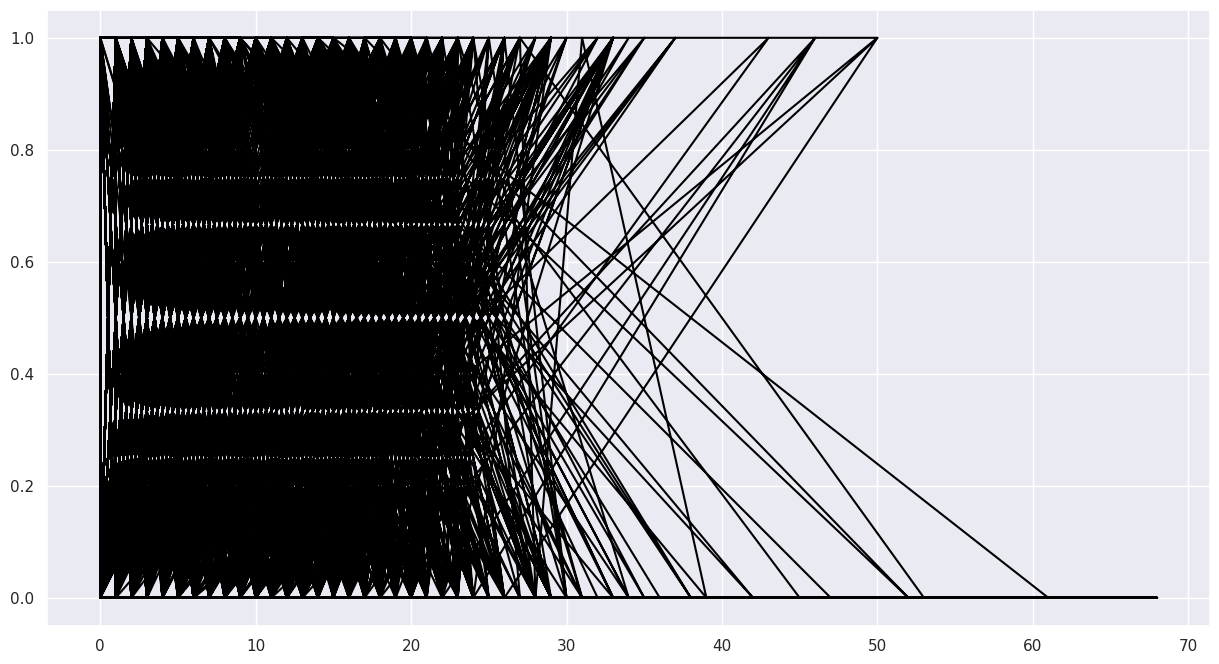

##Decision Tree Classifier Model

In [ ]:
#Create a Decision Tree Classifier Model
model = tree.DecisionTreeClassifier(max_depth=2)
model.fit(train_x, train_y)
pred_train=model.predict(train_x)
pred_test = model.predict(test_x)

print("Test Accuracy: ", accuracy_score(test_y, pred_test))
print("Training Accuracy: ", accuracy_score(train_y, pred_train))
accuracies["Decision Tree"]=accuracy_score(test_y, pred_test)


Test Accuracy:  0.8876325443489622
Training Accuracy:  0.8877665121304638


After some optimization testing, we found a tree depth of 2 to have the most accurate model.

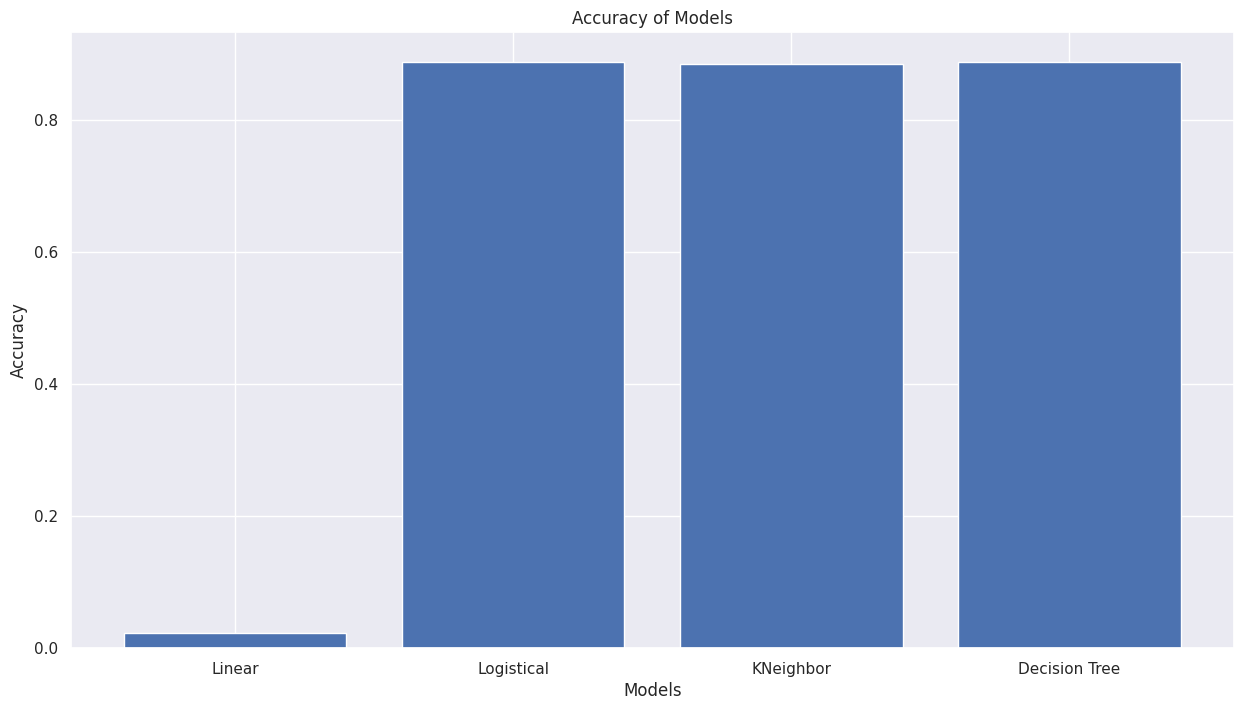

{'Linear': 0.02367313216662592, 'Logistical': 0.8873812754409769, 'KNeighbor': 0.8835619880396, 'Decision Tree': 0.8876325443489622}


In [ ]:
#Plot the accuracies
plt.bar(list(accuracies.keys()),list(accuracies.values()))
plt.title('Accuracy of Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')

plt.show()
print(accuracies)

##Conclusion

Diabetes healthcare expenses can be an intense financial burden for individuals and their families. Predictive modeling can help identify patients who are at risk of being readmitted. We tested four different models: Linear, Logistical, KNeighbor, and Decision Tree. The values associated with each model represent the accuracy score achieved by each model. The highest accuracy scores were obtained by the Logistical Regression and Decision Tree models, both with an accuracy score of approximately 0.89. The KNeighbor model achieved an accuracy score of approximately 0.88, which is also a relatively high score. However, the Linear model achieved a much lower accuracy score of only 0.02. From this analysis, we can conclude that the Logistical Regression, KNeighbor, and Decision Tree models are likely to be more effective in predicting the outcome of the data being analyzed compared to the Linear model. However, it is important to keep in mind that there may be other factors that could impact the overall effectiveness of each model, such as the size and quality of the dataset used to train and test each model, as well as any potential overfitting or underfitting issues. In the future, we can improve our models by perhaps adding any additional categories that may be less than our arbitrary limit of less than .3% correlation. 

According to the current correlation analysis of the machine learning project, the number of inpatient visits, number of emergency visits, and number of diagnoses are strongly correlated with the readmission status of diabetic patients. This suggests that patients with a higher frequency of inpatient and emergency visits, as well as more diagnoses, may be more likely to experience readmission. This could be due to factors such as the severity of their condition or the complexity of their medical needs. Moreover, the duration of hospital stay and the number of medications prescribed also exhibit a moderate level of correlation with readmission status. However, the use of insulin shows only a weak level of correlation with readmission status, indicating that it may not be a significant factor in predicting readmission. By understanding these correlations, healthcare providers can identify high-risk patients and develop strategies to prevent or manage readmissions.
 
